In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr

In [4]:
df=pd.read_csv(r"E:\COVID_PREDICTION\dataset\carona.csv")
df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN


In [3]:
df.isnull().sum()

age                  0
gender               0
occupation           0
line_of_work       696
time_bp              0
time_dp              0
travel_time          0
easeof_online        0
home_env             0
prod_inc             0
sleep_bal            0
new_skill            0
fam_connect          0
relaxed              0
self_time            0
like_hw              0
dislike_hw           0
prefer               0
certaindays_hw       0
Unnamed: 19       1175
time_bp.1            0
travel+work       1175
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1175 non-null   object 
 1   gender          1175 non-null   object 
 2   occupation      1175 non-null   object 
 3   line_of_work    479 non-null    object 
 4   time_bp         1175 non-null   int64  
 5   time_dp         1175 non-null   int64  
 6   travel_time     1175 non-null   float64
 7   easeof_online   1175 non-null   int64  
 8   home_env        1175 non-null   int64  
 9   prod_inc        1175 non-null   float64
 10  sleep_bal       1175 non-null   float64
 11  new_skill       1175 non-null   float64
 12  fam_connect     1175 non-null   float64
 13  relaxed         1175 non-null   float64
 14  self_time       1175 non-null   float64
 15  like_hw         1175 non-null   int64  
 16  dislike_hw      1175 non-null   int64  
 17  prefer          1175 non-null   o

In [5]:
#Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pickle

In [6]:
#Create LabelEncoder for categorical variables
le_age=LabelEncoder()
le_gender=LabelEncoder()
le_occupation=LabelEncoder()
le_line_of_work=LabelEncoder()
le_prefer=LabelEncoder()
le_certaindays_hw=LabelEncoder()

In [7]:
#Fit LabelEncoders on the training data
le_age.fit(df['age'])
le_gender.fit(df['gender'])
le_occupation.fit(df['occupation'])
le_line_of_work.fit(df['line_of_work'])
le_prefer.fit(df['prefer'])
le_certaindays_hw.fit(df['certaindays_hw'])




#Transform the categorical variables in your DataFrame
df['age']=le_age.transform(df['age'])
df['gender']=le_gender.transform(df['gender'])
df['occupation']=le_occupation.transform(df['occupation'])
df['line_of_work']=le_line_of_work.transform(df['line_of_work'])
df['prefer']=le_prefer.transform(df['prefer'])
df['certaindays_hw']=le_certaindays_hw.transform(df['certaindays_hw'])

In [8]:
# Remove unnecessary columns
df=df.drop(columns=['Unnamed: 19','time_bp.1','travel+work'])
df['line_of_work'].fillna(df['line_of_work'].mode()[0],inplace=True)


#Display summary statistics
df.describe(include='all')

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000
mean,1.993191,0.565957,4.902979,6.936170,7.415319,7.971915,1.027660,2.533617,2.752340,0.008936,-0.108936,0.146809,0.260426,0.035745,0.082979,734.840851,651.067234,0.288511,1.229787
std,1.860544,0.509399,2.252944,1.688778,2.005385,2.657007,0.713314,1.267609,1.235799,0.615083,0.621215,0.643686,0.686825,0.626637,0.541434,468.000935,502.319310,0.453263,0.827528
min,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,0.500000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,7.000000,5.000000,5.000000,0.500000,1.000000,2.000000,-0.500000,-0.500000,-0.500000,0.000000,-0.500000,-0.500000,100.000000,101.000000,0.000000,0.000000
50%,1.000000,1.000000,5.000000,8.000000,7.000000,9.000000,0.500000,2.000000,3.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,1001.000000,1000.000000,0.000000,1.000000
75%,3.000000,1.000000,7.000000,8.000000,9.000000,9.000000,1.500000,4.000000,4.000000,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,1100.000000,1101.000000,1.000000,2.000000
max,6.000000,2.000000,7.000000,8.000000,12.000000,12.000000,3.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1111.000000,1111.000000,1.000000,2.000000


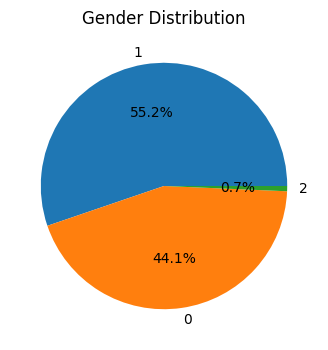

In [9]:
wr.filterwarnings("ignore")
# pie chart for 'gender'
plt.figure(figsize=(4, 4))
plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

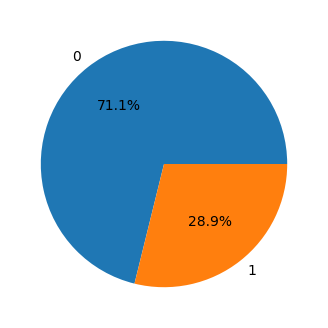

In [10]:
# pie chart for 'prefer'
plt.figure(figsize=(4,4))
plt.pie(df['prefer'].value_counts(),labels=df['prefer'].value_counts().index,autopct='%1.1f%%')
plt.show()

In [5]:
data = df.copy()
# Create a new binary variable 'lifestyle_change'
change_columns = ['prod_inc', 'sleep_bal', 'new_skill', 'fam_connect', 'relaxed', 'self_time']
data['lifestyle_change'] = data[change_columns].apply(lambda row: np.any(np.abs(row) > 0.5), axis=1).astype(int)

# Display the first few rows of the dataset
data.head(5)

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work,lifestyle_change
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN,1
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN,1
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN,1
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN,1
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN,0


In [6]:
data.head(20)

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work,lifestyle_change
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN,1
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN,1
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN,1
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN,1
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN,0
5,19-25,Male,Student in College,NaN,5,7,0.5,4,4,-1.0,...,0.0,0.0,110,1100,Complete Physical Attendance,No,NaN,5,NaN,1
6,19-25,Male,Student in College,NaN,5,4,0.5,1,3,0.5,...,1.0,1.0,1100,1101,Work/study from home,Yes,NaN,5,NaN,1
7,19-25,Male,Student in College,NaN,7,9,0.5,3,2,0.0,...,-0.5,0.0,1000,1000,Complete Physical Attendance,Yes,NaN,7,NaN,1
8,19-25,Male,Student in College,NaN,5,9,0.5,1,2,1.0,...,1.0,1.0,1010,100,Work/study from home,Yes,NaN,5,NaN,1
9,19-25,Male,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.0,1110,1111,Work/study from home,Yes,NaN,7,NaN,1


In [12]:
# Check the balance of classes in 'lifestyle_change'
data['lifestyle_change'].value_counts(normalize=True)

lifestyle_change
1    0.64766
0    0.35234
Name: proportion, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Split the target variable from the predictors
X = data.drop(columns='lifestyle_change')
y = data['lifestyle_change']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((940, 19), (235, 19))

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#Initialize the Random Forest Clasifier

rfc=RandomForestClassifier()


# Fit the model
rfc.fit(X_train,y_train)


# Make predictions on the test set
y_pred=rfc.predict(X_test)


# Model Accuracy
accuracy=accuracy_score(y_test,y_pred)

# Evaluate the model
print("Accuracy:",accuracy * 100)
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Accuracy: 97.87234042553192

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        85
           1       1.00      0.97      0.98       150

    accuracy                           0.98       235
   macro avg       0.97      0.98      0.98       235
weighted avg       0.98      0.98      0.98       235



In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
#Initialize the Logistic Regression model
lr=LogisticRegression(random_state=0)

# Fit the model
lr.fit(X_train,y_train)

# Make predictions on the test set
y_pred=lr.predict(X_test)

# Model Accuracy
accuracy=accuracy_score(y_test,y_pred)

# Evaluate the model
print("Accuracy:",accuracy * 100)
print("\nClassification Report: \n",classification_report(y_test,y_pred))

Accuracy: 66.38297872340425

Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.39      0.46        85
           1       0.70      0.82      0.76       150

    accuracy                           0.66       235
   macro avg       0.63      0.60      0.61       235
weighted avg       0.65      0.66      0.65       235



In [16]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dtc=DecisionTreeClassifier(random_state=40)

# Fit the model
dtc.fit(X_train,y_train)

# Make predictions on the test set
y_pred=dtc.predict(X_test)

#Model Accuracy
accuracy=accuracy_score(y_test,y_pred)

# Evaluate the model
print("Accuracy:",accuracy * 100)
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Accuracy: 99.14893617021276

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        85
           1       1.00      0.99      0.99       150

    accuracy                           0.99       235
   macro avg       0.99      0.99      0.99       235
weighted avg       0.99      0.99      0.99       235



In [17]:
import pickle
pickle.dump(dtc,open('lifestyle_change_due_to_covid_dtc_model.pkl','wb'))

In [18]:
model=pickle.load(open("lifestyle_change_due_to_covid_dtc_model.pkl",'rb'))
model.predict([[2,5,5,7,8,9,4,6,7,6,4,2,8,4,6,6,1,5,8]])

array([1])